In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

#Data Exploration

In [4]:
data.head(-5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [5]:
len(data)

284807

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


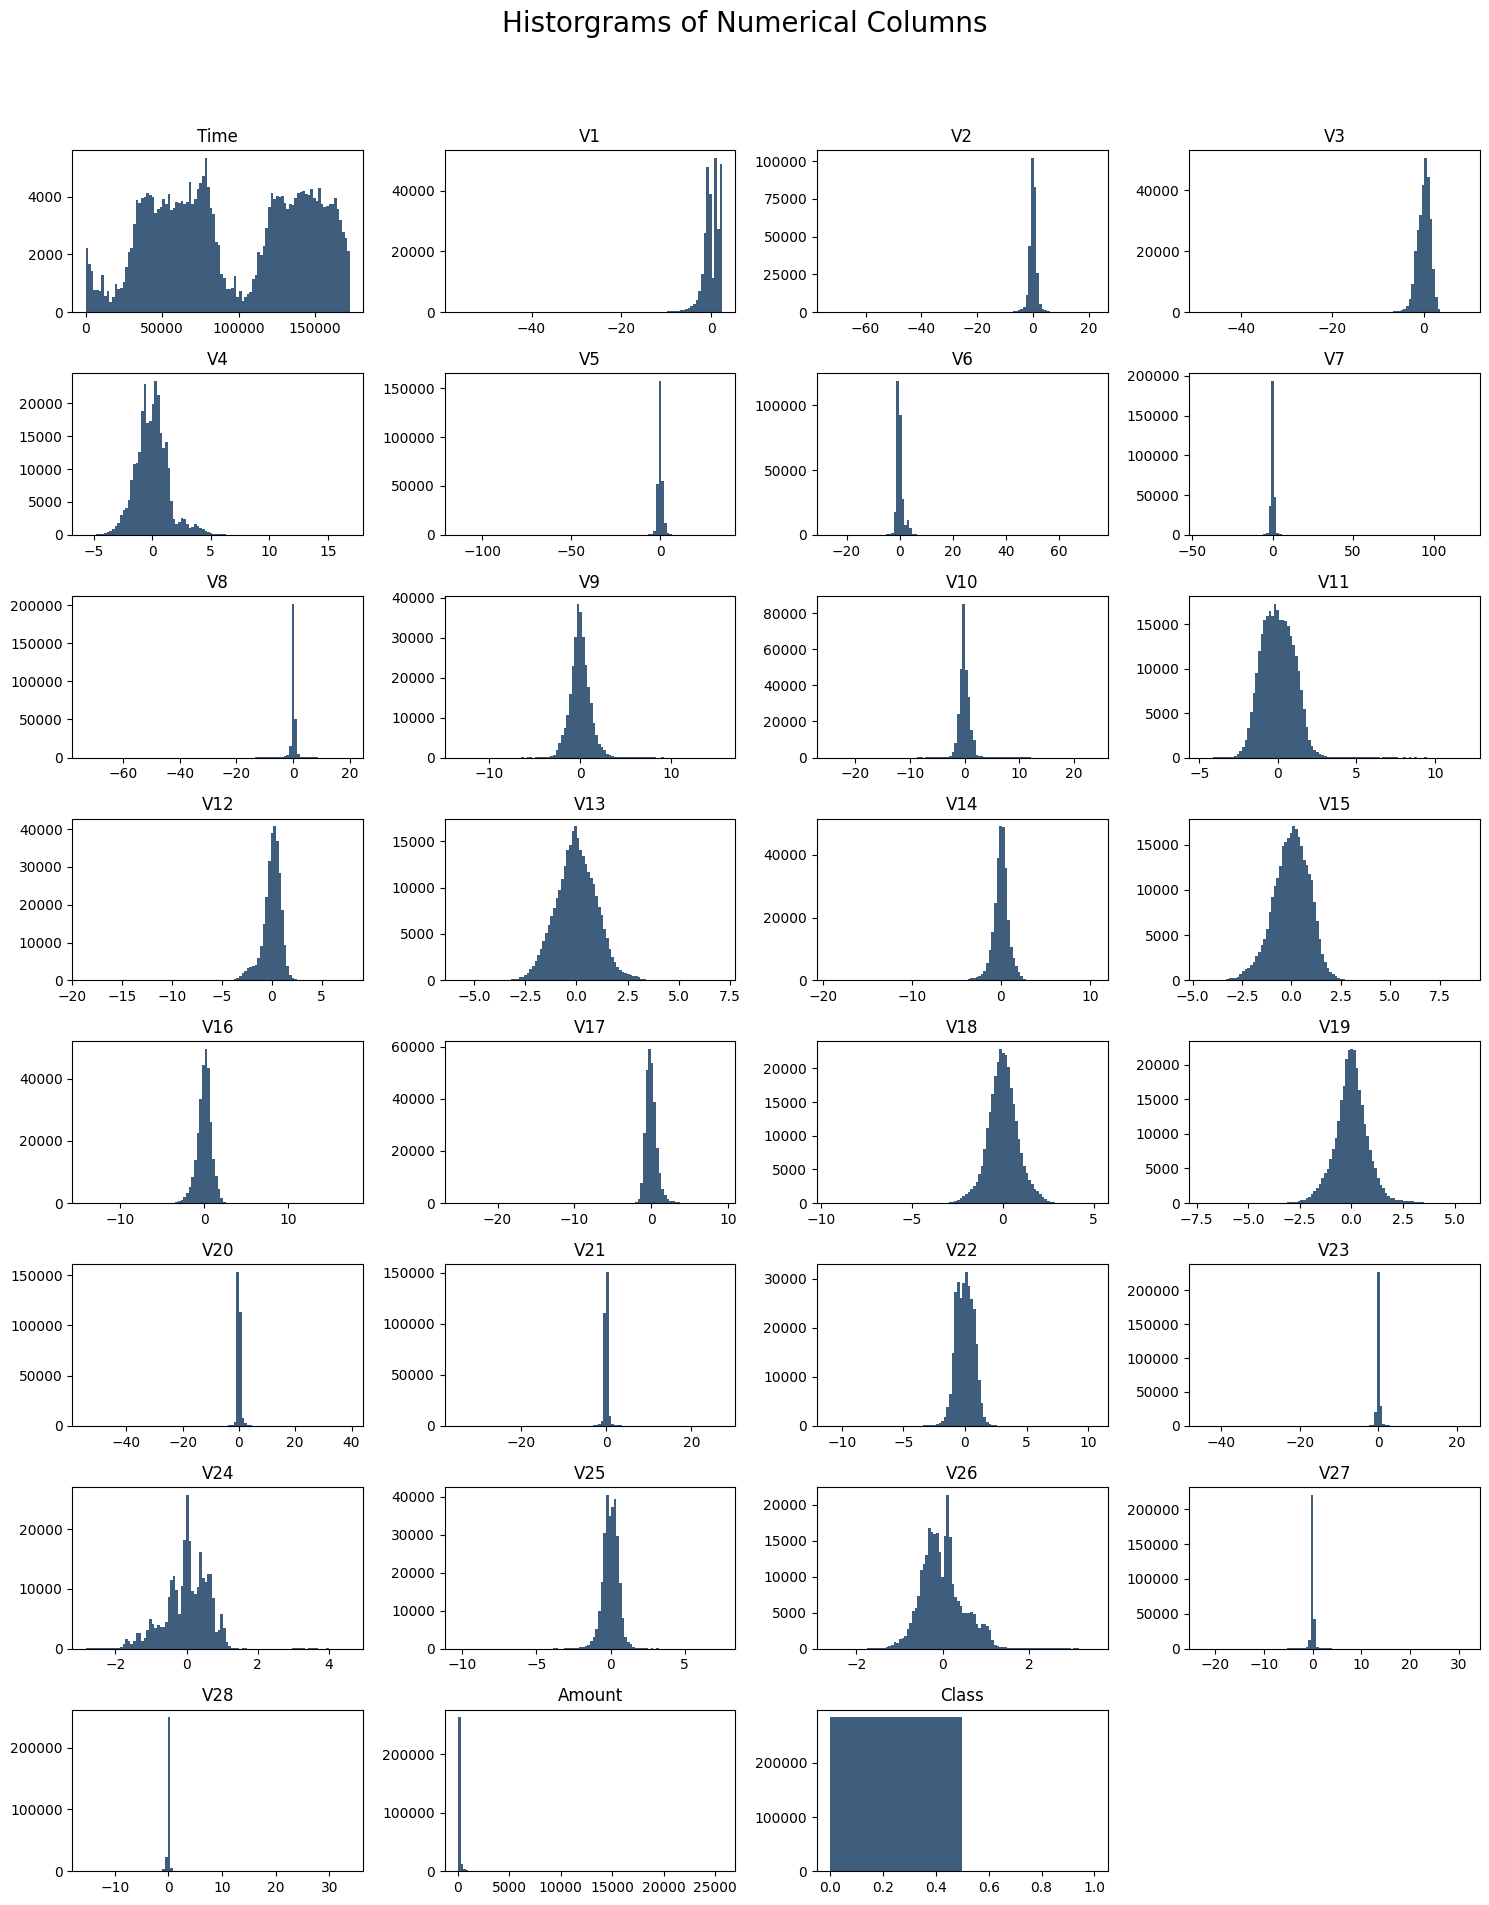

In [7]:
# building histograms

fig = plt.figure(figsize=(15,20))
plt.suptitle('Historgrams of Numerical Columns', fontsize=20)

for i in range(data.shape[1]):
  plt.subplot(8, 4, i + 1)
  f = plt.gca()
  f.set_title(data.columns.values[i])

  vals = np.size(data.iloc[:, i].unique())
  if vals >= 100:
    vals = 100                                            # restricting our bins to 100 max

  plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can see a large prevalence of Class 0 (not fraudulent).

In [8]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


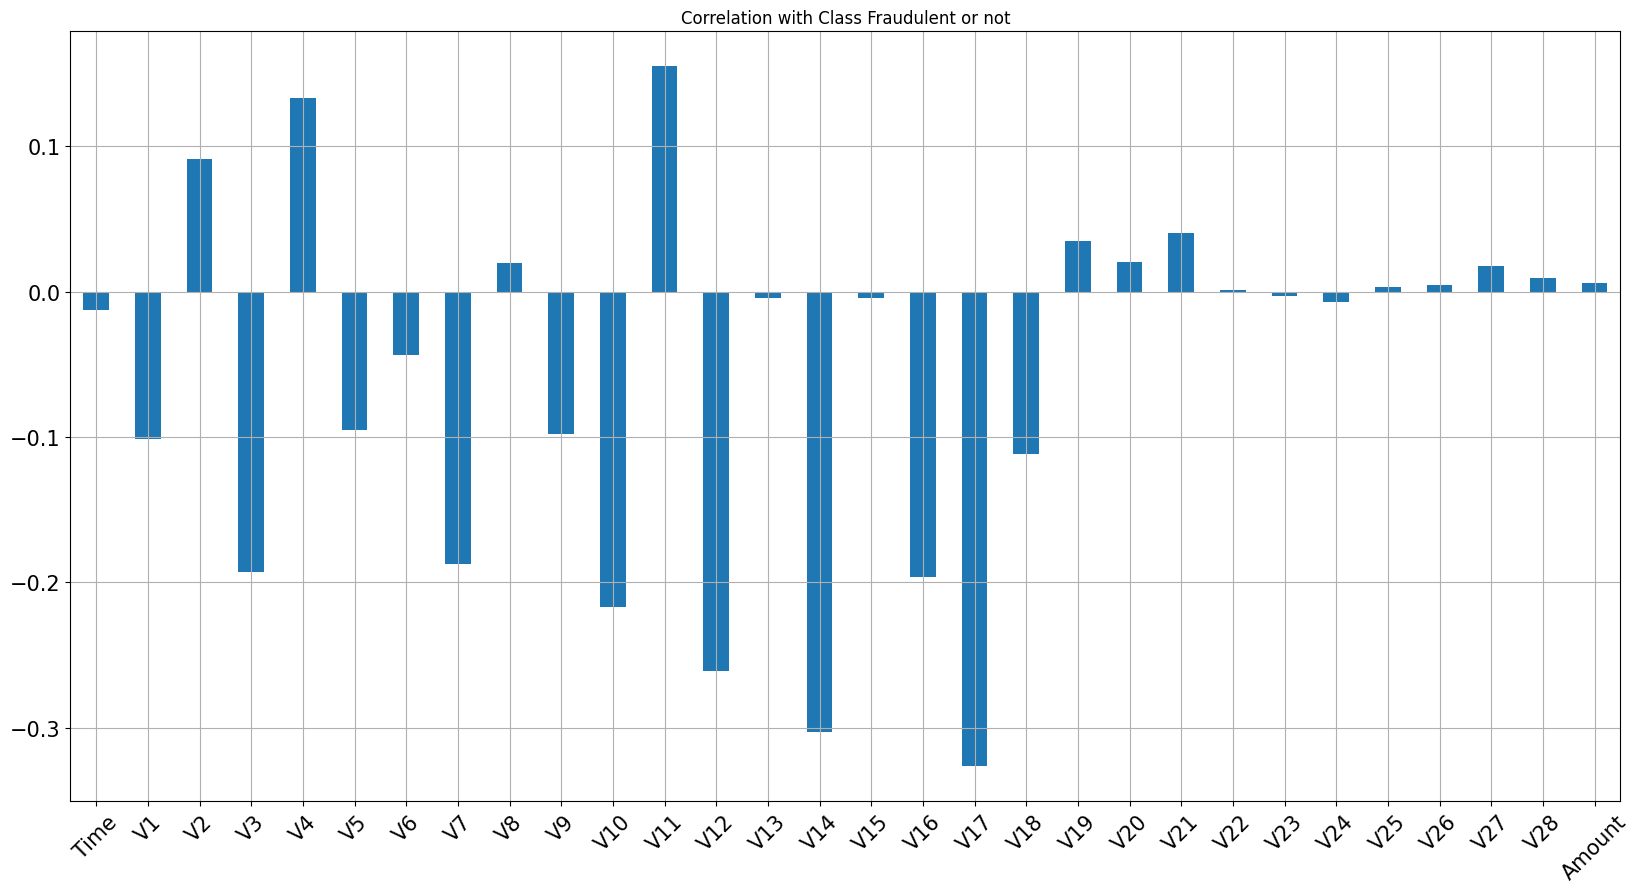

In [9]:
# Linear correlation with response variables (Note: Models like RandomForest are not linear)
data2 = data.drop(columns=['Class'])
data2.corrwith(data['Class']).plot.bar(
        figsize = (20,10), title = "Correlation with Class Fraudulent or not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

#Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1)) # Normalize 'Amount' in [-1, +1] range
data = data.drop(['Amount'], axis=1)

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
X_train.shape

(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [53]:
X_train.isnull().values.any()

True

In [25]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.fit_transform(X_test)
# y_train = imputer.fit_transform(y_train)
# y_test = imputer.fit_transform(y_test)

#Model Training

##1.Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
random_forest = RandomForestClassifier(n_estimators=100)

In [20]:
# Pandas Series.ravel() allows the flattened underlying data as a ndarray
random_forest.fit(X_train, y_train.values.ravel())  # np.ravel() returns a contiguous flattened array

RandomForestClassifier()

In [22]:
y_pred = random_forest.predict(X_test)

In [23]:
random_forest.score(X_test, y_test)

0.9995435553526912

In [24]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black')

  plt.xlabel('True label')
  plt.ylabel('Predicted label')
  plt.tight_layout()

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


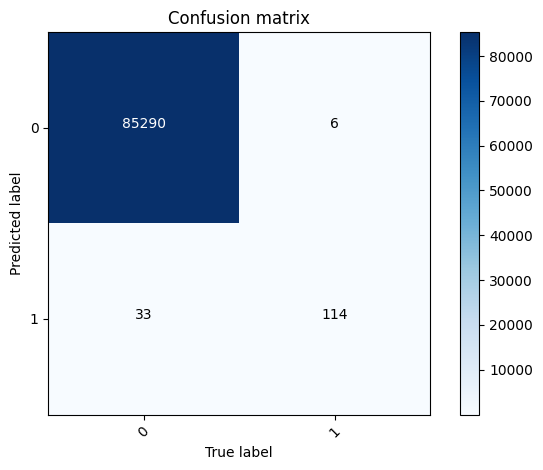

In [25]:
# Confusion matrix on the test dataset
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1'])

Observations :

Only 6 transactions are predicted wrongly as fraudulent, but the model only detects 78% of the fradulent transactions. As a result, 33 fraudulent transactions are not detected (false negatives).



We will try to improve this performance by using other models.

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9995 	precision:0.9500 	recall:0.7755 	F1-score:0.8539


We will store the performance of each model in a dataframe.

In [27]:
# Storing performance of model in a dataframe

results_test = pd.DataFrame([['Random Forest', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.95,0.77551,0.22449,0.853933


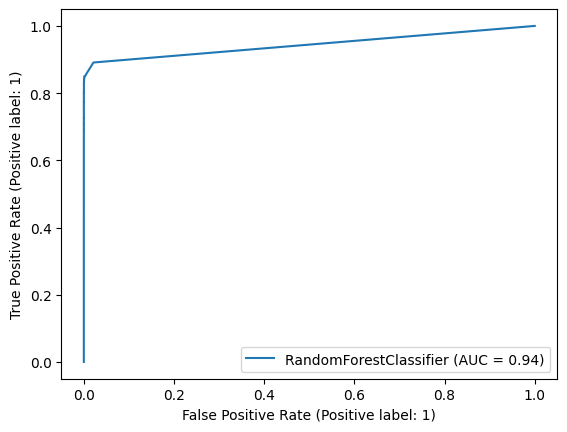

In [28]:
from sklearn.metrics import RocCurveDisplay

ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

We will run the model on the entire dataset to check once.

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


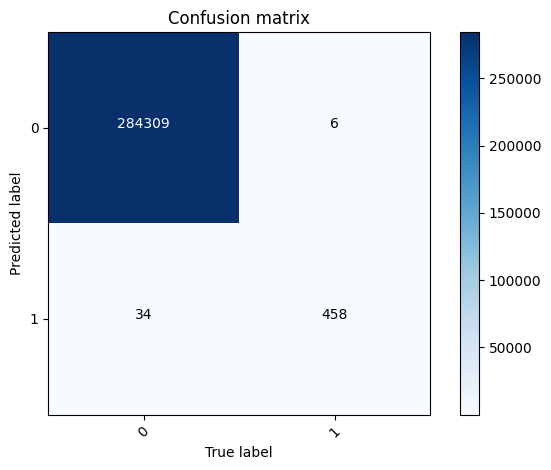

In [29]:
# Confusion matrix on the entire dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=['0', '1'])

In [30]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9999 	precision:0.9871 	recall:0.9309 	F1-score:0.9582


In [31]:
results_full = pd.DataFrame([['Random Forest', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.99986,0.987069,0.930894,0.069106,0.958159


##2. Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = decision_tree.predict(X_test)

In [34]:
decision_tree.score(X_test, y_test)

0.9992392589211521

Confusion matrix, without normalization
[[85267    29]
 [   36   111]]


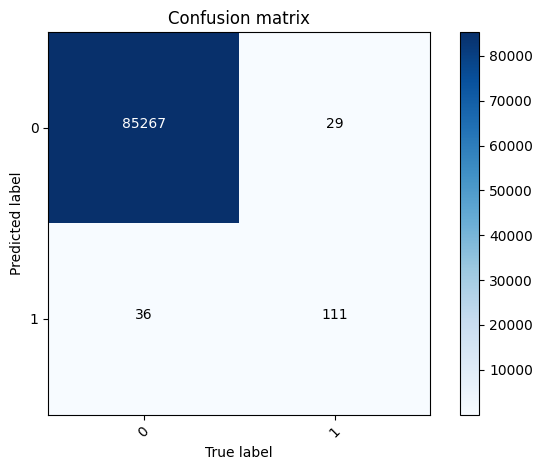

In [35]:
# Confusion matrix on test dataset
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1'])

The performance of the Decision Tree is lower than that of the Random Forest model.
We will check the other scores below.

In [36]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9992 	precision:0.7929 	recall:0.7551 	F1-score:0.7735


In [37]:
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test = pd.concat([results_test, model_results], ignore_index=True)
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.950000,0.775510,0.224490,0.853933
1,Decision Tree,0.999239,0.792857,0.755102,0.244898,0.773519


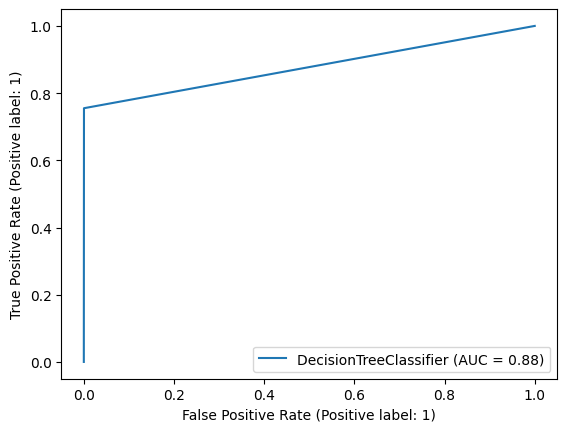

In [38]:
from sklearn.metrics import RocCurveDisplay

ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


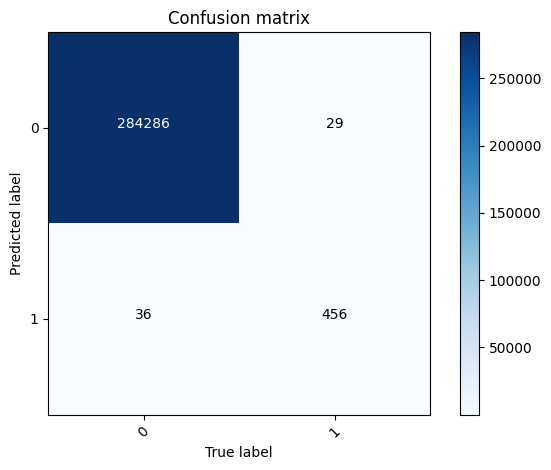

In [39]:
# Confusion matrix on the entire dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=['0', '1'])

In [40]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9998 	precision:0.9402 	recall:0.9268 	F1-score:0.9335


In [41]:
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full = pd.concat([results_full, model_results], ignore_index=True)
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999860,0.987069,0.930894,0.069106,0.958159
1,Decision Tree,0.999772,0.940206,0.926829,0.073171,0.933470


##3. Neural Networks

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

###A. Deep Neural Network

We will be using a simple neural network with 5 fully-connected layers with ReLU activation.
The network takes a vector of length 29 as input. This represents the infromation about the transactions (29 columns for each transaction).
The final layer (sigmoid acitvation) will output a probability distribution and classify either as not fraudulent (0) or fraudulent (1).
<br>
*Note: A dropout step will be added to prevent over-fitting.*

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [44]:
model = Sequential ([
    Dense(units=16, activation='relu', input_dim=29),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8.2

####Training the model

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0107 - accuracy: 0.9975
Epoch 2/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 29s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [47]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0031 - accuracy: 0.9994


In [48]:
print(score)

[0.0030663516372442245, 0.9994148015975952]


Observations:

* The model achieves an accuracy of 99.94%.
* However, our dataset is significantly composed of non-fraudulent samples with only 172 fraudulent per 100,000 transactions. Thus, a model that predicts 'not fraudulent' 100% of the time will achieve a 99.83% accuracy despite being unable to detect a single fraudulent case.

2671/2671 [==============================] - 3s 1ms/step
Test accuracy: 0.9994


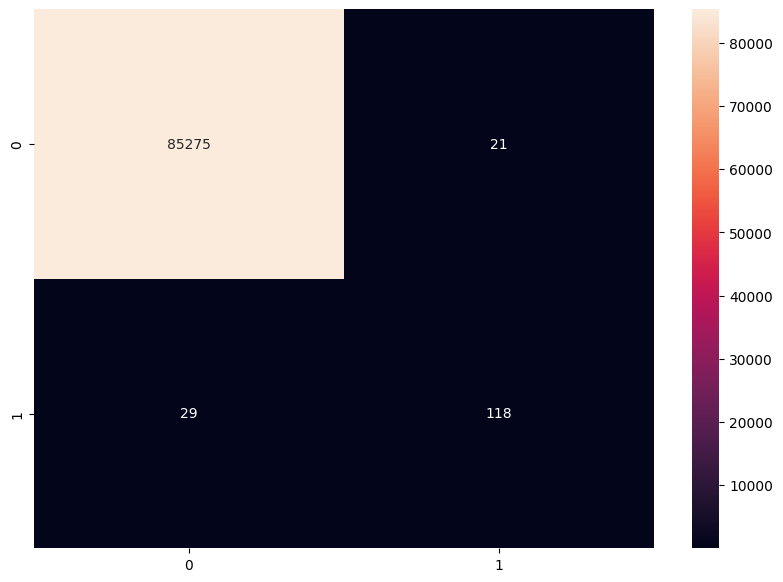

In [49]:
# Confusion matrix on unseen test set
import seaborn as sns

y_pred = model.predict(X_test)
# for i in range(len(y_pred)):
#   if y_pred[i] > 0.5:
#     y_pred[i] = 1
#   else:
#     y_pred[i] = 0
y_pred = y_pred.round()

cm = confusion_matrix(y_test, y_pred) # rows = truth, columns = prediction
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0,1))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
print('Test accuracy: %.4f'%accuracy_score(y_test, y_pred))

Detection of fraudulent transactions did not improve compared to the previous machine learning models.

* 119 fraudulent transactions are detected as fraudulent by the model, while 28 fraudulent transactions are not identified (false negatives) which remains an issue. Our objective should eb to detect as many fraudulent transactions as possible since these can have a huge negative impact.
* 22 non-fraudulent transactions are detected as fraudulent by the model. This number is negligible.

**Conclusion** : We must find ways to reduce the number of false negatives.

2671/2671 [==============================] - 4s 2ms/step
Confusion matrix, without normalization
[[85275    21]
 [   29   118]]


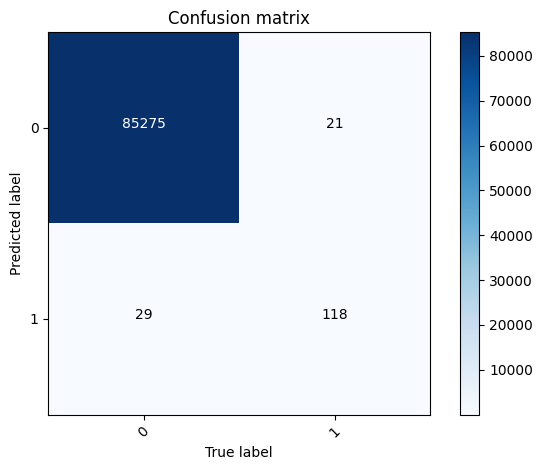

In [50]:
# Alternative approach to plot confusion matrix
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

In [51]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9994 	precision:0.8489 	recall:0.8027 	F1-score:0.8252


In [52]:
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test = pd.concat([results_test, model_results], ignore_index=True)
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.950000,0.775510,0.224490,0.853933
1,Decision Tree,0.999239,0.792857,0.755102,0.244898,0.773519
2,PlainNeuralNetwork,0.999415,0.848921,0.802721,0.197279,0.825175


8901/8901 [==============================] - 30s 3ms/step
Confusion matrix, without normalization
[[284245     70]
 [    92    400]]


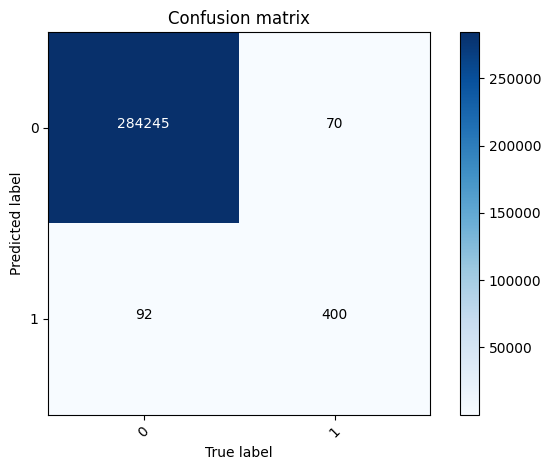

In [53]:
# Confusion atrix on the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

In [54]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9994 	precision:0.8511 	recall:0.8130 	F1-score:0.8316


In [55]:
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full = pd.concat([results_full, model_results], ignore_index=True)
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999860,0.987069,0.930894,0.069106,0.958159
1,Decision Tree,0.999772,0.940206,0.926829,0.073171,0.933470
2,PlainNeuralNetwork,0.999431,0.851064,0.813008,0.186992,0.831601


###B. Weighted loss to account for class imbalance in train dataset

We will adjust the class imbalance by giving additional weight to the loss associated with the errors made on fraudulent transaction detetction.

In [56]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=np.array([y_train[i][0] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.500866751415694, 1: 288.93333333333334}

The class 'fraudulent' (y=1) is assigned a weight of 289, while the 'not fraudulent' class is assigned 0.5 weight due to the very low prevalence of the former as we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent transactions during training.

In [57]:
model.fit(X_train, y_train, batch_size=15, epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.1971 - accuracy: 0.9921
Epoch 2/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.1658 - accuracy: 0.9941
Epoch 3/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.2175 - accuracy: 0.9775
Epoch 4/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.1424 - accuracy: 0.9789
Epoch 5/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.1955 - accuracy: 0.9788


In [58]:
score_weighted = model.evaluate(X_test, y_test)
print(score_weighted)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0478 - accuracy: 0.9783
[0.04784878343343735, 0.9783013463020325]


2671/2671 [==============================] - 3s 1ms/step
Test accuracy: 0.9783


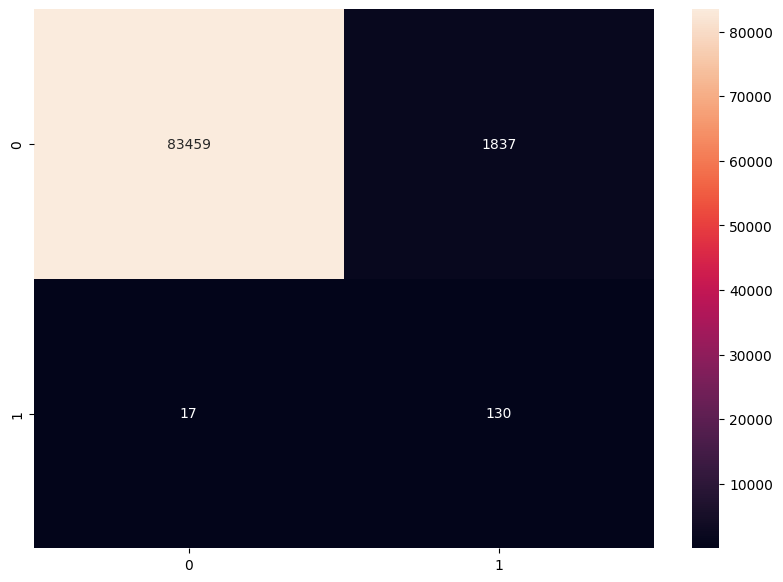

In [59]:
# Confusion matrix on unseen test set
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = y_pred.round()

cm = confusion_matrix(y_test, y_pred) # rows = truth, columns = prediction
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0,1))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
print('Test accuracy: %.4f'%accuracy_score(y_test, y_pred))

The accuracy has dropped quite a bit, as we can see. But, to gauge the true model performance, we need to look at more detailed evaluation measures like precision and recall.<br>
This model is actually much better at detecting fraudulent cases now. The false negative rate has dropped, which is a key criteria for our purpose.<br>
But, on the other hand, the number of false positives has also gone up by a lot, which is not negligible anymore. This is what affects the model accuracy

In [60]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9783 	precision:0.0661 	recall:0.8844 	F1-score:0.1230


In [61]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test = pd.concat([results_test, model_results], ignore_index=True)
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.950000,0.775510,0.224490,0.853933
1,Decision Tree,0.999239,0.792857,0.755102,0.244898,0.773519
2,PlainNeuralNetwork,0.999415,0.848921,0.802721,0.197279,0.825175
3,WeightedNeuralNetwork,0.978301,0.066090,0.884354,0.115646,0.122990


8901/8901 [==============================] - 12s 1ms/step
Confusion matrix, without normalization
[[278115   6200]
 [    27    465]]


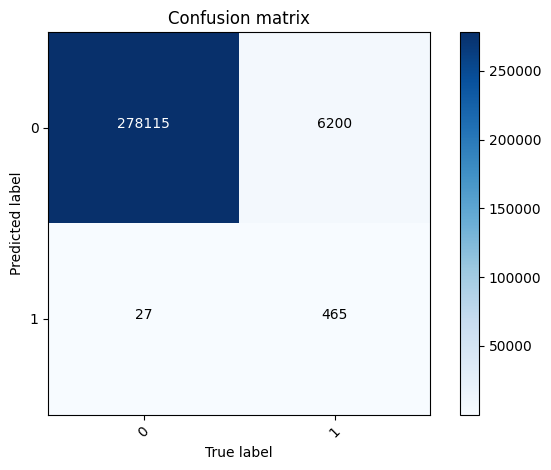

In [62]:
# Confusion atrix on the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

In [63]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9781 	precision:0.0698 	recall:0.9451 	F1-score:0.1299


In [64]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full = pd.concat([results_full, model_results], ignore_index=True)
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999860,0.987069,0.930894,0.069106,0.958159
1,Decision Tree,0.999772,0.940206,0.926829,0.073171,0.933470
2,PlainNeuralNetwork,0.999431,0.851064,0.813008,0.186992,0.831601
3,WeightedNeuralNetwork,0.978136,0.069767,0.945122,0.054878,0.129943


###C. Undersampling

In order to balance the train set, another technique is called undersampling. With this technique, the largest is adjusted to match the number of samples belonging to the under-represented class. <br>
Here, we want to pick a number of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [65]:
fraud_indices = np.array(data[data.Class == 1].index)
number_fraud_records = len(fraud_indices)
print(number_fraud_records)

492


In [66]:
normal_indices = np.array(data[data.Class == 0].index)
len(normal_indices)

284315

In [67]:
# Randomly select N indices from non-fraudulent samples (N being the number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_fraud_records, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [69]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [71]:
under_sample_data = data.iloc[under_sample_indices, :]

In [72]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [74]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8.2

In [76]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 2s 4ms/step - loss: 0.1147 - accuracy: 0.9651
Epoch 2/5
46/46 [==============================] - 0s 4ms/step - loss: 0.1126 - accuracy: 0.9666
Epoch 3/5
46/46 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9666
Epoch 4/5
46/46 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9666
Epoch 5/5
46/46 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9680


10/10 [==============================] - 0s 4ms/step
Confusion matrix, without normalization
[[137   9]
 [  6 144]]


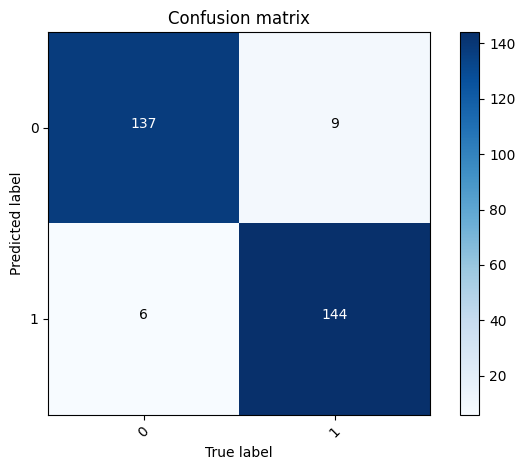

In [77]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

The metrics look pretty strong on the test set...

In [78]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9493 	precision:0.9412 	recall:0.9600 	F1-score:0.9505


In [79]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test = pd.concat([results_test, model_results], ignore_index=True)
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.950000,0.775510,0.224490,0.853933
1,Decision Tree,0.999239,0.792857,0.755102,0.244898,0.773519
2,PlainNeuralNetwork,0.999415,0.848921,0.802721,0.197279,0.825175
3,WeightedNeuralNetwork,0.978301,0.066090,0.884354,0.115646,0.122990
4,UnderSampledNeuralNetwork,0.949324,0.941176,0.960000,0.040000,0.950495


...But the model fails on non-fraudulent transactions as show below.

8901/8901 [==============================] - 30s 3ms/step
Confusion matrix, without normalization
[[276680   7635]
 [    21    471]]


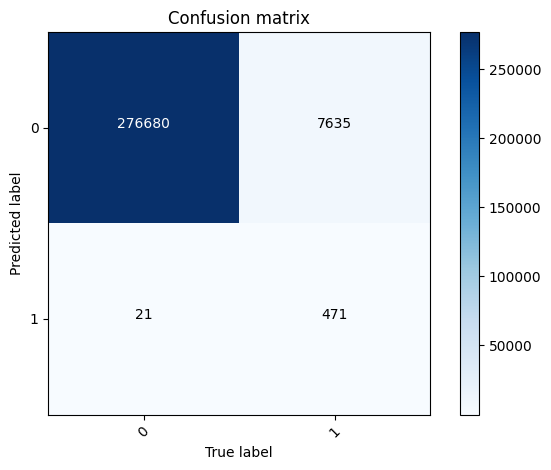

In [80]:
# Confusion atrix on the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

In [81]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9731 	precision:0.0581 	recall:0.9573 	F1-score:0.1096


In [82]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full = pd.concat([results_full, model_results], ignore_index=True)
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999860,0.987069,0.930894,0.069106,0.958159
1,Decision Tree,0.999772,0.940206,0.926829,0.073171,0.933470
2,PlainNeuralNetwork,0.999431,0.851064,0.813008,0.186992,0.831601
3,WeightedNeuralNetwork,0.978136,0.069767,0.945122,0.054878,0.129943
4,UnderSampledNeuralNetwork,0.973119,0.058105,0.957317,0.042683,0.109560


###D. Oversampling technique using SMOTE
(Synthetic Minority Oversampling TEchnique)

The alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one. <br>
This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique will alow us to massively increase the number of fraudulent transactions.

In [83]:
%%bash
pip install imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE

In [86]:
X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())

In [88]:
y_resample

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
print('Number of total transactions before SMOTE upsampling: ', len(y), ' ...after SMOTE upsampling: ', len(y_resample))

Number of total transactions before SMOTE upsampling:  284807  ...after SMOTE upsampling:  568630


In [92]:
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class == 1]),
      ' ...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of fraudulent transactions before SMOTE upsampling:  492  ...after SMOTE upsampling:  284315


In [93]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [95]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [96]:
model = Sequential ([
    Dense(units=16, activation='relu', input_dim=29),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [97]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 97s 4ms/step - loss: 0.0399 - accuracy: 0.9867
Epoch 2/5
26537/26537 [==============================] - 107s 4ms/step - loss: 0.0153 - accuracy: 0.9959
Epoch 3/5
26537/26537 [==============================] - 89s 3ms/step - loss: 0.0123 - accuracy: 0.9969
Epoch 4/5
26537/26537 [==============================] - 65s 2ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 5/5
26537/26537 [==============================] - 65s 2ms/step - loss: 0.0101 - accuracy: 0.9976


5331/5331 [==============================] - 24s 5ms/step
Confusion matrix, without normalization
[[84961   292]
 [   57 85279]]


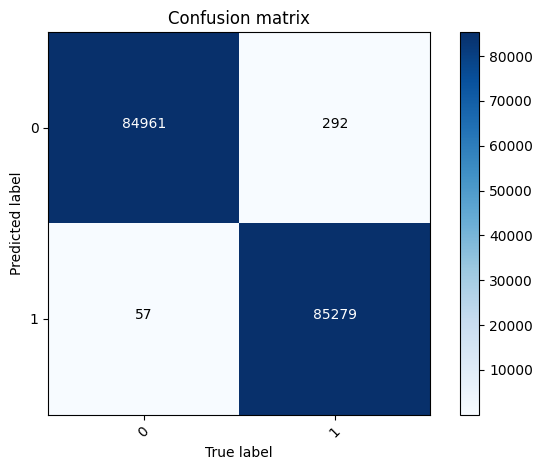

In [98]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

Notice the number of false negatives in comparison with the true negatives. This model is mostly able to detect all fraudulent transactions on the unseen test set.

In [99]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9980 	precision:0.9966 	recall:0.9993 	F1-score:0.9980


In [100]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_test = pd.concat([results_test, model_results], ignore_index=True)
results_test

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999544,0.950000,0.775510,0.224490,0.853933
1,Decision Tree,0.999239,0.792857,0.755102,0.244898,0.773519
2,PlainNeuralNetwork,0.999415,0.848921,0.802721,0.197279,0.825175
3,WeightedNeuralNetwork,0.978301,0.066090,0.884354,0.115646,0.122990
4,UnderSampledNeuralNetwork,0.949324,0.941176,0.960000,0.040000,0.950495
5,OverSampledNeuralNetwork,0.997954,0.996588,0.999332,0.000668,0.997958


All metrics are excellent for this model.

8901/8901 [==============================] - 26s 3ms/step
Confusion matrix, without normalization
[[283423    892]
 [     3    489]]


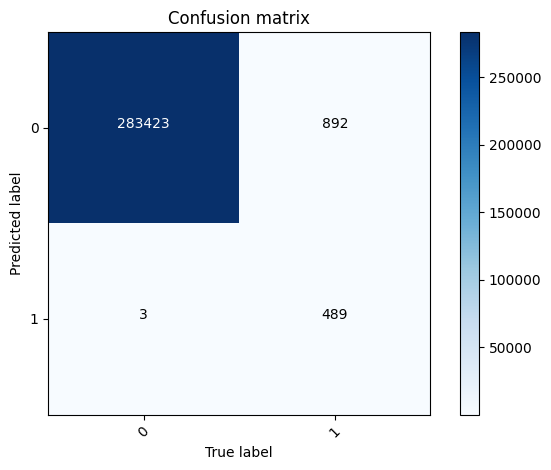

In [101]:
# Confusion atrix on the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])
plt.show()

Notice the near absence of false negatives. This model is able to detect almsot all fraudulent transaction in the full dataset. <br>
The limited number of false positives also means a lot less verification work (on legitimate transactions) for the fraud department.

In [102]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

print('accuracy:%.4f'%acc, '\tprecision:%.4f'%prec, '\trecall:%.4f'%rec, '\tF1-score:%.4f'%f1)

accuracy:0.9969 	precision:0.3541 	recall:0.9939 	F1-score:0.5222


In [108]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, prec, rec, 1-rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'FalseNegRate', 'F1 Score'])
results_full = pd.concat([results_full, model_results], ignore_index=True)
results_full

,Model,Accuracy,Precision,Recall,FalseNegRate,F1 Score
0,Random Forest,0.999860,0.987069,0.930894,0.069106,0.958159
1,Decision Tree,0.999772,0.940206,0.926829,0.073171,0.933470
2,PlainNeuralNetwork,0.999431,0.851064,0.813008,0.186992,0.831601
3,WeightedNeuralNetwork,0.978136,0.069767,0.945122,0.054878,0.129943
4,UnderSampledNeuralNetwork,0.973119,0.058105,0.957317,0.042683,0.109560
5,OverSampledNeuralNetwork,0.996858,0.354091,0.993902,0.006098,0.522157
